In [1]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
%pylab inline
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv('../data/train/train.csv', encoding="ISO-8859-1")
test = pd.read_csv('../data/test/test.csv', encoding="ISO-8859-1")
descr = pd.read_csv('../data/train/product_descriptions.csv')
attr = pd.read_csv('../data/train/attributes.csv')
train_size = train.shape[0]
test_size = test.shape[0]
print ("train_size", train_size)
print ("test_size", test_size)

('train_size', 74067)
('test_size', 166693)


In [5]:
train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [6]:
test.head()

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [7]:
descr.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [8]:
attr.head()

,product_uid,name,value
0,100001.0,Bullet01,Versatile connector for various 90° connection...
1,100001.0,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001.0,Bullet03,Help ensure joints are consistently straight a...
3,100001.0,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001.0,Bullet05,Made from 12-Gauge steel


In [9]:
attr.name.value_counts(normalize=True)[:10]

MFG Brand Name          0.042180
Bullet02                0.042179
Bullet03                0.042168
Bullet04                0.042143
Bullet01                0.042028
Product Width (in.)     0.029899
Bullet05                0.029601
Product Height (in.)    0.026750
Product Depth (in.)     0.026238
Product Weight (lb.)    0.022093
Name: name, dtype: float64

## Since raters didn't have access to the attributes, let's set this dataset aside for now

In [3]:
train = pd.merge(train, descr, how='left', on='product_uid')
test = pd.merge(test, descr, how='left', on='product_uid')

In [11]:
train.describe()

,id,product_uid,relevance
count,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634
std,64016.573650,30770.774864,0.533984
min,2.000000,100001.000000,1.000000
25%,57163.500000,115128.500000,2.000000
50%,113228.000000,137334.000000,2.330000
75%,168275.500000,166883.500000,3.000000
max,221473.000000,206650.000000,3.000000


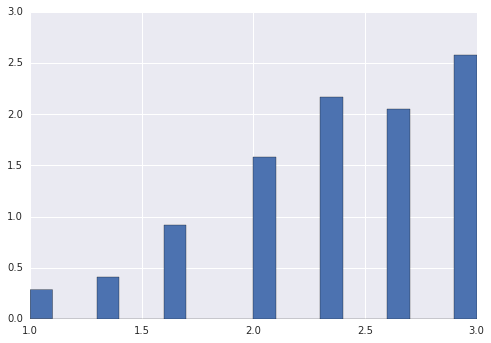

In [12]:
train.relevance.hist(bins=20, normed=True)

## Only ~16% of rates are lower than 2 (worse than "relevant"). ~58% are between 2 and 3. 26% are pefect matches (3.0)

In [13]:
train.relevance.value_counts(normalize=True)

3.00    0.258212
2.33    0.216831
2.67    0.205247
2.00    0.158370
1.67    0.091539
1.33    0.040585
1.00    0.028420
2.50    0.000257
2.25    0.000149
2.75    0.000149
1.75    0.000122
1.50    0.000068
1.25    0.000054
Name: relevance, dtype: float64

## It seems that raters gave integer rates, and there were 3 or 4 raters for each row

In [14]:
for col in train.drop(['id', 'product_uid', 'relevance'], axis=1).columns:
    print(col)
    print(train[col].value_counts(normalize=False)[:3])

product_title
Pressure-Treated Timber #2 Southern Yellow Pine (Common: 4 in. x 4 in. x 8 ft.; Actual: 3.56 in. x 3.56 in. x 96 in.)    21
Lithonia Lighting All Season 4 ft. 2-Light Grey T8 Strip Fluorescent Shop Light                                          21
2 in. x 4 in. x 96 in. Premium Kiln-Dried Whitewood Stud                                                                 18
Name: product_title, dtype: int64
search_term
bed frames headboaed                           16
anderson windows 400 seriesimpact resistant    16
contact paoer                                  16
Name: search_term, dtype: int64
product_description
Ready to assemble means you save with Heartland Cabinetry.  Heartland Cabinets are shipped to you unassembled.  Each cabinet comes with simple assembly and installation instructions that require only standard household tools.  Make your home a special place for everyday living.  Heartland Cabinetry captures the classic style and grace that creates a charming setti

In [15]:
train['search_term'].value_counts(normalize=True)[:10]

bed frames headboaed                           0.000216
anderson windows 400 seriesimpact resistant    0.000216
contact paoer                                  0.000216
3 WAY TOGGLE SWITCH                            0.000216
everblit heavy duty canvas dropcloth           0.000216
burgundy red foot stools                       0.000216
metal sheet                                    0.000216
moen chat oil bronze tub/shower faucet         0.000216
1/2 zip wall                                   0.000216
decorative window sheeting                     0.000203
Name: search_term, dtype: float64

In [16]:
test['search_term'].value_counts(normalize=True)[:10]

patio chair cushions      0.000216
tarpaulin                 0.000138
tree stand                0.000138
bathroom vanity lights    0.000138
flashing                  0.000138
dolly                     0.000138
sliding door lock         0.000138
drill guide               0.000138
flex seal                 0.000138
tv antenna                0.000138
Name: search_term, dtype: float64

## Search terms are just a few words. Product titles are longer and include many numbers. Product descriptions contain several lines

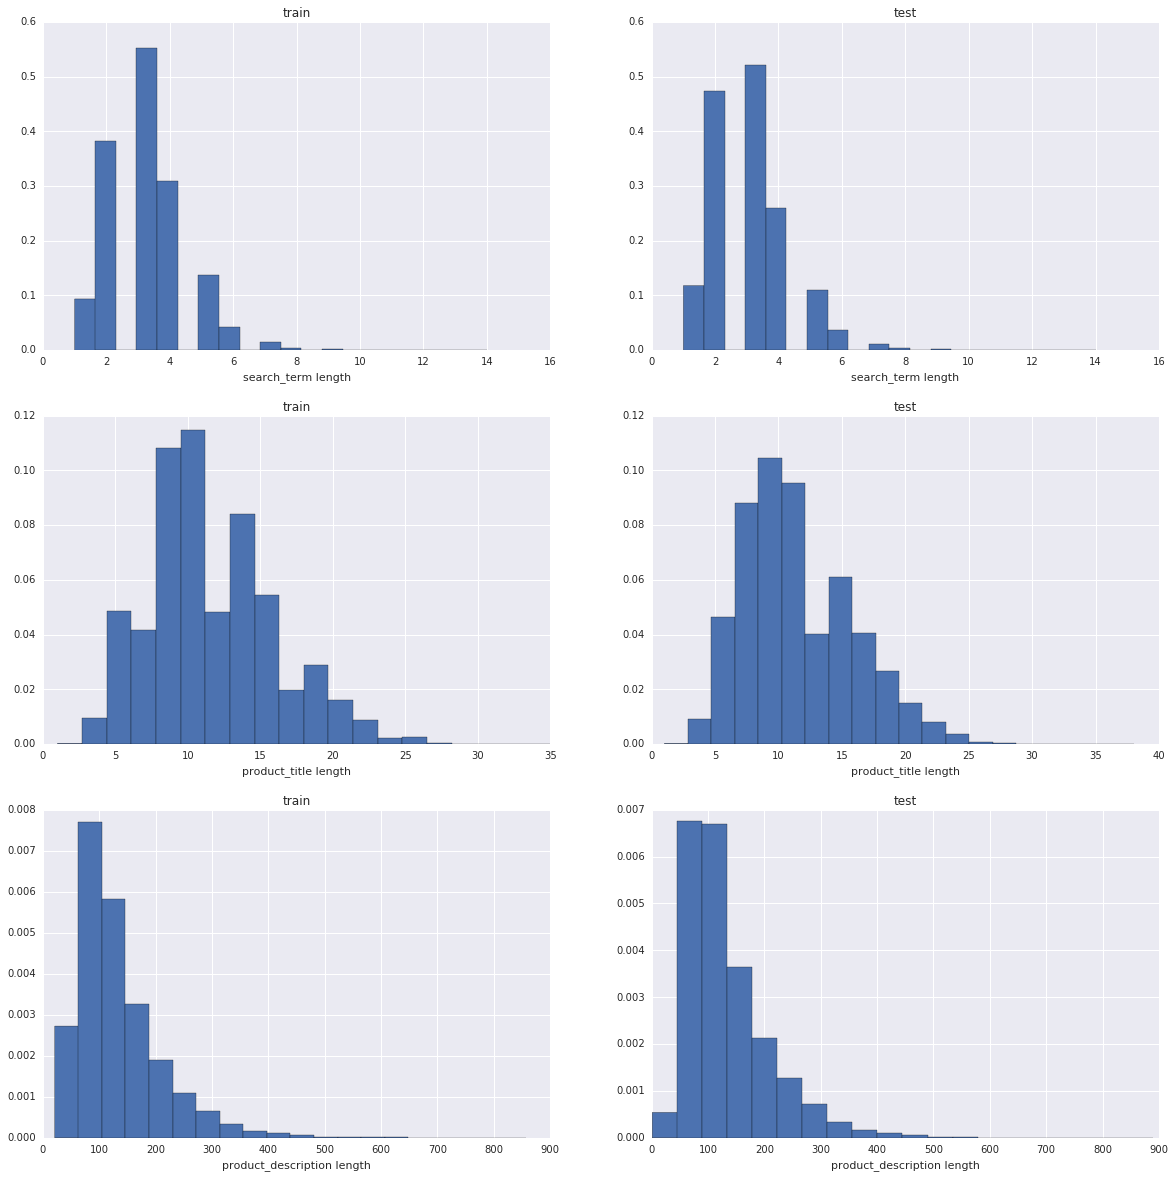

In [17]:
predictors = ['search_term', 'product_title', 'product_description']
fig, ax = plt.subplots(figsize=(20,20), nrows=len(predictors), ncols=2)
for i, feat in enumerate(predictors):
    for j, df in enumerate([train, test]):
        ax[i][j].hist(df[feat].apply(lambda x: len(x.split())), normed=True, bins=20)
        ax[i][j].set_xlabel(feat + ' length')
        ax[i][0].set_title('train')
        ax[i][1].set_title('test')


## The distribution of lenghts is similar in both train and test sets

In [18]:
for df in [train, test]:
    print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [id, product_uid, product_title, search_term, relevance, product_description]
Index: []
Empty DataFrame
Columns: [id, product_uid, product_title, search_term, product_description]
Index: []


## No missing values!!

## Let's make columns with the length of query, title, and description. And other columns with the number of common words between the query (search_term) and the title and description. Before and after steming (exact and approximate matches)

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english'))
porter = PorterStemmer()
# stemmers = [('porter', PorterStemmer), 
#         ('snowball', SnowballStemmer('english')), 
#         ('wordnet', WordNetLemmatizer)]
#train, test = train.copy(), test.copy()
predictors = ['search_term', 'product_title', 'product_description']
first_pred = predictors

def feature_extractor(train, test):

    for df in [train, test]: 
        for col in first_pred:

            df[col + '_length'] = df[col].apply(lambda x: len(x.split()) * 1.)

            df['tokenized_' + col] = df[col].apply(lambda x: word_tokenize(x.lower()))

            df['tokenized_' + col] = [[token for token in tokens if token not in stop] # we might want to include words                                          
                                            for tokens in df['tokenized_' + col]]  # like over, which are stop words
            
            df['stemized_' + col] = [[porter.stem(word) for word in words] for words in df['tokenized_'+col]]


        for col in first_pred:
            if col != 'search_term':
                a = zip(df['tokenized_search_term'], df['tokenized_' + col])
                df[col + '_query_exactmatch'] = [len(set(i) & set(j)) * 1. for i, j in a]  

                a = zip(df['stemized_search_term'], df['stemized_' + col])
                df[col + '_query_match'] = [len(set(i) & set(j)) * 1. for i, j in a]  

        for col in first_pred:
            df['stemized_' + col] = df['stemized_' + col].apply(lambda x: ' '.join(x))

#     tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features=100)
#     tfidf.fit(train.stemized_search_term)

    return train, test



In [6]:
df_tr, df_test = feature_extractor(train, test)

## Let's make  a tf-idf bag of words from the search_term feature. We will only keep the 100 most commond 1-grams and 2-grams across all search_term queries. In this particular case (search_terms containing few words), those 100 words should be nearly the same as those with the lowest idf, as I don't expect queries containing the same word more than once, except errors.

## Note we are using the log(1+term freq) rather than term frequency itself.

In [9]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from collections import defaultdict

def bag_words(train, test):
    
        
    tfidf = TfidfVectorizer(ngram_range=(1, 1), token_pattern='(?u)\\b\\w+\\b', min_df=10, max_features=None, stop_words=None, 
                            lowercase=True, sublinear_tf=True, smooth_idf=True)
    tr_bag = tfidf.fit_transform(train.stemized_search_term)
    test_bag = tfidf.transform(test.stemized_search_term)
     
    # inverse document frequency = tfidf.idf_ 
    # sort columns in bag of words according to idf
    indices = np.argsort(tfidf.idf_)
    terms = tfidf.get_feature_names()
    terms = [terms[i] for i in indices]
    tr_bag = tr_bag[:,indices].todense()
    test_bag = test_bag[:,indices].todense()
    print("terms with the lowest idf: ", terms[:5])
    
    predictors = ['id', 'search_term_length', 'product_title_length', 'product_description_length',
                'product_title_query_exactmatch', 'product_title_query_match', 
                'product_description_query_exactmatch', 'product_description_query_match']
    train = train.loc[:,predictors]
    test = test.loc[:,predictors]
    
    tr_bag = pd.DataFrame(data=tr_bag, columns=terms, index=train['id'])
    train = pd.merge(train, tr_bag, how='left',left_on='id', right_index=True)
    
    test_bag = pd.DataFrame(data=test_bag, columns=terms, index=test['id'])
    test = pd.merge(test, test_bag, how='left', left_on='id', right_index=True)

    return train, test

In [10]:
train, test = bag_words(df_tr, df_test)


('terms with the lowest idf: ', [u'door', u'light', u'1', u'2', u'4'])


In [23]:
train['door'].value_counts(normalize=True).iloc[:5]

0.000000    0.951328
1.000000    0.017646
0.538678    0.002660
0.632127    0.002052
0.539165    0.001917
Name: door, dtype: float64

## ['door', 'light', 'tile', 'inch', 'wall'] are the most common terms in queries. 5% of the queries contain the word door

In [24]:
[col for col in train.columns if len(col.split())>1]

['water heater']

## There's only one 2-gram ('water heater') among the most frequent search_terms

In [25]:
train.describe()

,id,search_term_length,product_title_length,product_description_length,product_title_query_exactmatch,product_title_query_match,product_description_query_exactmatch,product_description_query_match,door,light,...,stove,garag,mower,garden,ge,closet,water heater,tree,36,20
count,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,...,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000
mean,112385.709223,3.159207,11.566393,133.725667,1.540335,1.739682,1.481375,1.678750,0.033984,0.035990,...,0.003950,0.004129,0.004565,0.004334,0.004152,0.004106,0.002867,0.004624,0.003351,0.003605
std,64016.573650,1.262096,4.272845,77.113082,1.084788,1.078294,1.066505,1.066816,0.158939,0.168142,...,0.056765,0.058662,0.065045,0.062068,0.060080,0.059403,0.041148,0.066866,0.049764,0.054135
min,2.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57163.500000,2.000000,8.000000,80.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,113228.000000,3.000000,11.000000,114.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,168275.500000,4.000000,14.000000,165.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,221473.000000,14.000000,35.000000,857.000000,10.000000,10.000000,9.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.635856,1.000000,1.000000,1.000000


In [26]:
# we dropped relevance above. Let's insert it at the beginning
train.insert(0, 'relevance', df_tr.relevance)

In [34]:
train.corr(method='pearson')

,relevance,id,search_term_length,product_title_length,product_description_length,product_title_query_exactmatch,product_title_query_match,product_description_query_exactmatch,product_description_query_match,door,...,stove,garag,mower,garden,ge,closet,water heater,tree,36,20
relevance,1.000000,-0.116426,-0.072279,-0.018810,0.039927,0.207945,0.238750,0.187918,0.208070,0.006027,...,-0.013929,-0.005718,0.006583,-0.007671,0.009849,0.000464,0.021625,0.001924,0.003923,-0.010498
id,-0.116426,1.000000,0.192900,0.044192,-0.072650,0.151097,0.161848,0.050415,0.049504,-0.005330,...,-0.018257,-0.016204,-0.029024,0.008327,-0.000207,-0.015678,-0.036214,0.005757,0.003819,0.009468
search_term_length,-0.072279,0.192900,1.000000,0.145657,0.059321,0.476029,0.496420,0.458113,0.481139,0.091614,...,0.000782,0.038640,0.015883,-0.011872,0.030338,0.022427,0.067411,0.008753,0.081591,0.073324
product_title_length,-0.018810,0.044192,0.145657,1.000000,0.283225,0.198780,0.213936,0.107605,0.103353,0.082126,...,-0.007266,-0.001120,-0.005114,-0.012042,-0.004307,-0.010760,0.031269,0.008845,0.041767,-0.001467
product_description_length,0.039927,-0.072650,0.059321,0.283225,1.000000,0.081343,0.070232,0.158314,0.138841,0.063563,...,0.053052,0.013200,0.055985,-0.004780,0.083180,-0.009351,0.070999,-0.012337,0.027100,0.010842
product_title_query_exactmatch,0.207945,0.151097,0.476029,0.198780,0.081343,1.000000,0.924486,0.665800,0.614469,0.065065,...,-0.017504,0.009693,0.005767,0.002149,0.057023,-0.013832,0.095623,0.012806,0.052201,0.021598
product_title_query_match,0.238750,0.161848,0.496420,0.213936,0.070232,0.924486,1.000000,0.647556,0.673782,0.089693,...,-0.027274,0.017762,0.009224,0.003578,0.048861,-0.003097,0.098996,0.018761,0.051883,0.020814
product_description_query_exactmatch,0.187918,0.050415,0.458113,0.107605,0.158314,0.665800,0.647556,1.000000,0.920982,0.091026,...,-0.013141,0.041743,0.014707,0.000618,0.056618,0.018882,0.119727,0.001920,0.048323,0.008234
product_description_query_match,0.208070,0.049504,0.481139,0.103353,0.138841,0.614469,0.673782,0.920982,1.000000,0.102396,...,-0.019606,0.052436,0.020887,0.002949,0.047965,0.027577,0.121247,0.004756,0.044247,0.005972
door,0.006027,-0.005330,0.091614,0.082126,0.063563,0.065065,0.089693,0.091026,0.102396,1.000000,...,-0.014878,0.128446,-0.015007,-0.008103,-0.003884,0.048576,-0.014897,-0.014787,0.021902,-0.014239


In [27]:
pearson_corr = train.corr(method='pearson').relevance.sort_values(ascending=False)
pearson_corr[abs(pearson_corr)>0.025]

relevance                               1.000000
product_title_query_match               0.238750
product_description_query_match         0.208070
product_title_query_exactmatch          0.207945
product_description_query_exactmatch    0.187918
product_description_length              0.039927
led                                     0.037260
sink                                    0.034784
vaniti                                  0.033169
light                                   0.031087
dewalt                                  0.030894
drill                                   0.028534
faucet                                  0.027652
pipe                                   -0.026784
replac                                 -0.027422
search_term_length                     -0.072279
id                                     -0.116426
Name: relevance, dtype: float64

## These are the features with the highest linear correlation to the relevance. Note that,  as oposed to description, the longer the query length, the lower the relevance (should I use just term frequencies rather than tfidf?). Number of word matches are good predictors (note this is univariate)

In [28]:
spearman_corr = train.corr(method='spearman').relevance.sort_values(ascending=False)
spearman_corr[abs(spearman_corr)>0.03]

relevance                               1.000000
product_title_query_match               0.226005
product_title_query_exactmatch          0.197066
product_description_query_match         0.195245
product_description_query_exactmatch    0.175472
product_description_length              0.039546
led                                     0.035722
sink                                    0.035172
light                                   0.034822
vaniti                                  0.033516
dewalt                                  0.030962
pipe                                   -0.030370
replac                                 -0.030451
search_term_length                     -0.117370
id                                     -0.126681
Name: relevance, dtype: float64

In [11]:
spearman_corr = train.corr(method='spearman').relevance.sort_values(ascending=False)
spearman_corr

KeyboardInterrupt: 

## Spearman correlation doesn't provide any additional information

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


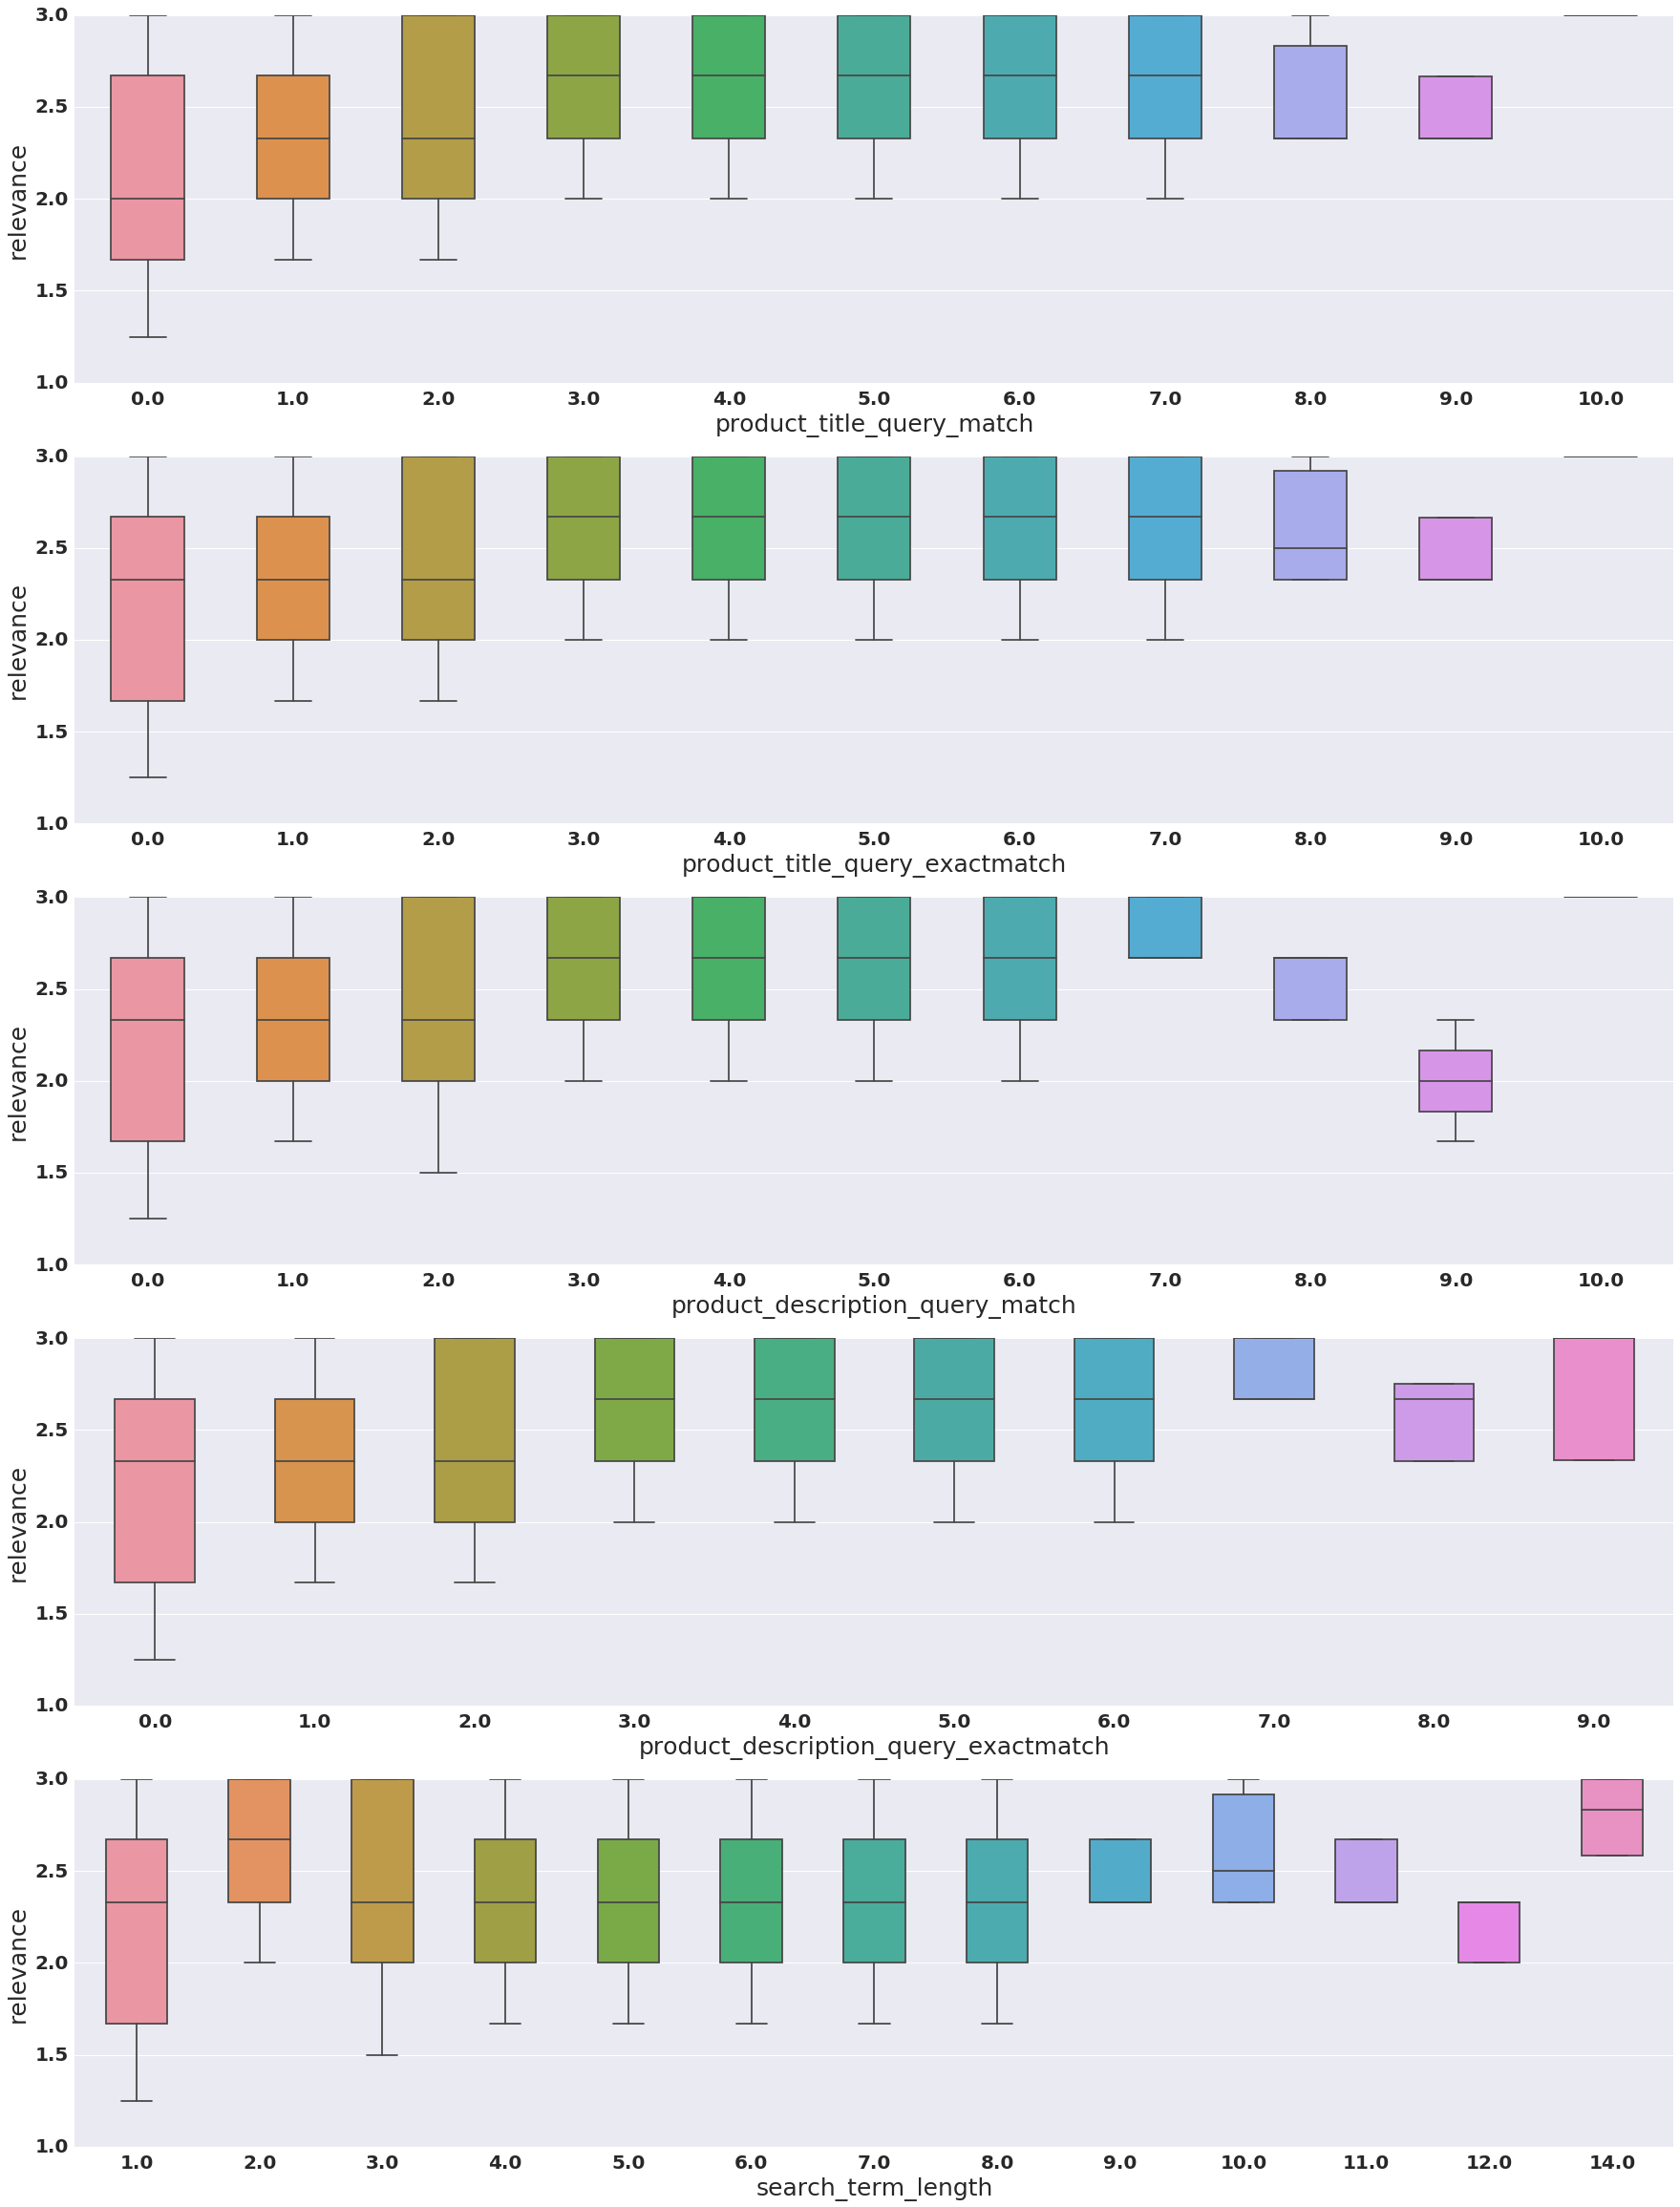

In [68]:
#from pandas import scatter_matrix
best = spearman_corr[abs(spearman_corr)>0.11].index.tolist()
best.remove('id')
best.remove('relevance')
# scatter_matrix(train[best], alpha=0.5, figsize=(100, 50), diagonal='hist');
matplotlib.rc('xtick', labelsize=20);
matplotlib.rc('ytick', labelsize=20);
fig, ax = plt.subplots(figsize=(30, 40), nrows=len(best), ncols=1)
df = train.copy()
for i, col in enumerate(best):
    seaborn.boxplot(df[col], df['relevance'], width=0.5, whis=0.5, fliersize=0, ax=ax[i])
    ax[i].set_xlabel(col, fontsize=25)
    ax[i].set_ylabel('relevance', fontsize=25)
plt.show()
    

## There's an interesting observation here. Search terms with 2 words (25% of the total) give much better results than the average query. As we can see below, only 12% are worse than "relevant" (relevance=2) and 38% are perfect matches. For all search_terms, these number are 16% and 25%, respectively. CHECK if the fraction of matches (number_matches / len(search_term))  is high for 2-word queries!! Let's just add these ratios for now

In [65]:
train.search_term_length.value_counts(normalize=True)

3.0     0.358797
2.0     0.248235
4.0     0.200454
5.0     0.089122
1.0     0.060796
6.0     0.028029
7.0     0.010004
8.0     0.002754
9.0     0.001080
11.0    0.000419
10.0    0.000135
12.0    0.000122
14.0    0.000054
Name: search_term_length, dtype: float64

In [123]:
train[train.search_term_length==2].relevance.value_counts(normalize=True)*100

3.00    37.604699
2.67    20.771239
2.33    18.329163
2.00    11.187860
1.67     7.076036
1.33     2.828239
1.00     2.159252
2.50     0.032634
2.75     0.005439
1.50     0.005439
Name: relevance, dtype: float64

In [73]:
# Let's use first these features
common_words = ['door', 'light', 'tile', 'inch', 'wall'] 
corr_words = ['led', 'sink', 'light', 'vaniti'] 
predictors = best + ['product_description_length'] + common_words + corr_words 

## We are going to use words that very common or that are corrleated with the target variable acording to pearson and spearman

In [74]:
predictors

['product_title_query_match',
 'product_title_query_exactmatch',
 'product_description_query_match',
 'product_description_query_exactmatch',
 'search_term_length',
 'product_description_length',
 'door',
 'light',
 'tile',
 'inch',
 'wall',
 'led',
 'sink',
 'light',
 'vaniti']

In [75]:
train, test = train[predictors+['relevance']], test[predictors] 

In [76]:
# Add ratios
def add_ratios(train, test):
    for df in [train, test]:
        for col in best:
            if col != 'search_term_length':
                df[col+"/search_term_length"] = 1. * df[col] / df['search_term_length'] 
                
    return train, test

In [77]:
train, test = add_ratios(train, test)

In [78]:
train.columns

Index(['product_title_query_match', 'product_title_query_exactmatch',
       'product_description_query_match',
       'product_description_query_exactmatch', 'search_term_length',
       'product_description_length', 'door', 'light', 'tile', 'inch', 'wall',
       'led', 'sink', 'light', 'vaniti', 'relevance',
       'product_title_query_match/search_term_length',
       'product_title_query_exactmatch/search_term_length',
       'product_description_query_match/search_term_length',
       'product_description_query_exactmatch/search_term_length'],
      dtype='object')

In [79]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor as RF
X = train.drop('relevance', axis=1).values
y = train.relevance.values
rf = RF(n_estimators=100, random_state=1, n_jobs=-1)
# 20 features. half of them correlated. 10 presumbly irrelevant
params = {'max_features':[5, 10], 'max_depth':[7, 15]}
rf = GridSearchCV(rf, params,  scoring='mean_squared_error', cv=2, n_jobs=-1, error_score=14., verbose=1)
rf.fit(X, y)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


/opt/conda/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/conda/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/conda/lib/python3.5/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/opt/conda

GridSearchCV(cv=2, error_score=14.0,
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [7, 15], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=1)

In [85]:
print("square-root MSE", np.sqrt(abs(rf.best_score_)))
print("best configuration", rf.best_params_)

square-root MSE 0.496571179437
best configuration {'max_depth': 7, 'max_features': 10}


In [95]:
feat_score = list(zip(train.drop('relevance', axis=1).columns, rf.best_estimator_.feature_importances_))
feat_score = sorted(feat_score, key=lambda x: x[1], reverse=True)
print("Feature importances:")
for k in feat_score:
    print(k[0], " = ", 100*round(k[1], 3))

Feature importances:
product_title_query_match/search_term_length  =  47.3
product_description_query_match/search_term_length  =  20.6
product_title_query_exactmatch/search_term_length  =  7.7
product_description_query_exactmatch/search_term_length  =  6.4
product_title_query_match  =  5.4
search_term_length  =  3.7
product_description_length  =  2.9
product_description_query_match  =  2.2
product_title_query_exactmatch  =  1.2
door  =  0.4
product_description_query_exactmatch  =  0.4
light  =  0.3
light  =  0.3
sink  =  0.3
inch  =  0.2
tile  =  0.2
vaniti  =  0.2
wall  =  0.1
led  =  0.1


In [96]:
from sklearn.metrics import mean_squared_error 
y_pred = rf.predict(X)
train_error = np.sqrt(mean_squared_error(y, y_pred))
print("train_error", train_error)

train_error 0.486640257937


In [111]:
rf.grid_scores_

[mean: -0.24718, std: 0.01125, params: {'max_depth': 5, 'max_features': 3},
 mean: -0.24671, std: 0.01108, params: {'max_depth': 5, 'max_features': 6},
 mean: -0.24628, std: 0.01044, params: {'max_depth': 10, 'max_features': 3},
 mean: -0.24641, std: 0.01050, params: {'max_depth': 10, 'max_features': 6}]

In [118]:
train[train.search_term_length==2]["product_title_query_match/search_term_length"].value_counts(normalize=True)

1.0    0.441151
0.5    0.379256
0.0    0.178995
1.5    0.000598
Name: product_title_query_match/search_term_length, dtype: float64

In [120]:
train["product_title_query_match/search_term_length"].value_counts(normalize=True).iloc[:5]

1.000000    0.233842
0.500000    0.175746
0.666667    0.170265
0.000000    0.125508
0.333333    0.097344
Name: product_title_query_match/search_term_length, dtype: float64

## We confirm our earlier hypothesis, namely, search terms containing 2 words match more words in the product title: the 2 words 44% of the times and one of them 38% of the times. 23% and 18% for search terms of any length